# Fashion MNIST 연습 : DNN

## 1.라이브러리 불러오기

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
labels = ['T-shirt',
          'Trouser',
          'Pullover',
          'Dress',
          'Coat',
          'Sandal',
          'Shirt',
          'Sneaker',
          'Bag',
          'Ankle boot'
          ]

print(labels)

['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
import numpy as np
import matplotlib.pyplot as plt

idx = 34903
다음 이미지는 Ankle boot


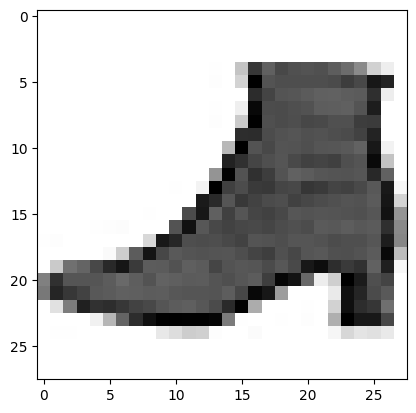

In [8]:
idx = np.random.randint(0, 60000)

print(f'idx = {idx}')
print(f'다음 이미지는 {labels[train_y[idx]]}')

plt.imshow(train_x[idx], cmap='Greys')
plt.show()

## 2.preprocessing

* X : Min-Max Scaling

In [9]:
## MinMaxScaler 금지!

In [10]:
max_n, min_n = train_x.max(), train_x.min()
max_n, min_n

(255, 0)

In [11]:
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [12]:
train_x.max(), train_x.min()

(1.0, 0.0)

* X : Data Reshape (흑백 채널 추가)

In [13]:
train_x.shape

(60000, 28, 28)

In [14]:
train_x_re = train_x.reshape(train_x.shape[0], 28, 28, -1)
test_x_re = test_x.reshape(test_x.shape[0], 28, 28, -1)

In [15]:
train_x_re.shape

(60000, 28, 28, 1)

In [16]:
# np.expand_dims(train_x, axis=3)

* Y : One-hot Encoding

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
train_y.shape

(60000,)

In [19]:
class_n = len(np.unique(train_y))

In [20]:
train_y_hot = to_categorical(train_y, class_n)
test_y_hot = to_categorical(test_y, class_n)

In [21]:
train_y_hot.shape

(60000, 10)

## 3.Modeling
1. Sequential API
2. Functional API

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.backend import clear_session
from keras.optimizers import Adam

In [23]:
clear_session()
model = Sequential([Conv2D(32, input_shape = (28,28,1), kernel_size = (3,3), padding = 'same', strides = 1, activation = 'relu'),
                    MaxPooling2D(pool_size = (2,2), strides = 2),
                    BatchNormalization(),
                    Dropout(rate=0.2),
                    Conv2D(120, kernel_size = (3,3), padding = 'same', strides = 1, activation = 'relu'),
                    MaxPooling2D(pool_size = (2,2), strides = 2),
                    BatchNormalization(),
                    Dropout(rate=0.2),
                    Flatten(),
                    Dense(32, activation = 'relu'),
                    Dense(10, activation = 'softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 120)       34680     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 120)         0

In [24]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy')
history = model.fit(train_x_re, train_y_hot, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 18s 5ms/step - loss: 0.4111 - val_loss: 0.3047
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2811 - val_loss: 0.2582
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2407 - val_loss: 0.2706
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2212 - val_loss: 0.3012
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2036 - val_loss: 0.3271
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1885 - val_loss: 0.2415
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1789 - val_loss: 0.2619
Epoch 8/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1681 - val_loss: 0.2377
Epoch 9/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1604 - val_loss: 0.2476
Epoch 10/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.15

In [25]:
pred = model.predict(test_x_re)

313/313 [==============================] - 1s 4ms/step


In [27]:
pred_1 = pred.argmax(axis=1)

In [28]:
pred_1

array([9, 2, 1, ..., 8, 1, 5])

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,pred_1))

0.9026


In [32]:
## Functional API
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping

clear_session()

il = Input(shape=(28,28,1))
hl = Conv2D(32, kernel_size = (3,3), padding = 'same', strides = 1, activation = 'relu')(il)
hl = MaxPooling2D(pool_size = (2,2), strides = 2)(hl)
hl = BatchNormalization()(hl)
hl = Dropout(rate = 0.2)(hl)
hl = Conv2D(120, kernel_size = (3,3), padding = 'same', strides = 1, activation = 'relu')(hl)
hl = MaxPooling2D(pool_size = (2,2), strides = 2)(hl)
hl = BatchNormalization()(hl)
hl = Dropout(rate = 0.2)(hl)
hl = Flatten()(hl)
hl = Dense(32, activation = 'relu')(hl)
out = Dense(10, activation = 'softmax')(hl)

model = tf.keras.Model(il, out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 120)       34680 

In [34]:
es = EarlyStopping(monitor = 'val_loss', # 적용 대상
                   min_delta = 0,  # 설정한 값 이상으로 변화해야 성능 개선으로 간주 (threshold)
                   patience = 3,   # 성능 개선이 발생하지 않을 때, 몇 에포크 더 볼지
                   verbose = 1,
                   restore_best_weights = True) # 얼리스토핑 적용 후, 최적의 가중치를 모델에 전달

In [35]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy')
history = model.fit(train_x_re, train_y_hot, epochs = 10, validation_split=0.2, callbacks=[es]).history

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.4263 - val_loss: 0.3318
Epoch 2/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2954 - val_loss: 0.2875
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2535 - val_loss: 0.2716
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2315 - val_loss: 0.2743
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2136 - val_loss: 0.2609
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1985 - val_loss: 0.2360
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1829 - val_loss: 0.2656
Epoch 8/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1737 - val_loss: 0.2385
Epoch 9/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1611 - val_loss: 0.2354
Epoch 10/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0

In [36]:
pred = model.predict(test_x_re)
pred1 = pred.argmax(axis = 1)
print(accuracy_score(test_y,pred_1))

313/313 [==============================] - 1s 2ms/step
0.9026
